This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [72]:
#importing all required library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.tree import DecisionTreeClassifier 
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")


In [73]:
#uploading dataset
ds=pd.read_csv("Baseball_Case_Study.csv")
ds

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [74]:
#changing Dataset in Dataframe
ds=pd.DataFrame(data=ds)

# Dataset basic details analysis (Null Value,data type, shape etc )

In [75]:
# top 5 rows of dataset
ds.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [76]:
#name of column index
ds.keys()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [77]:
ds.W

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [78]:
ds["AB"]

0     5575
1     5467
2     5439
3     5533
4     5605
5     5509
6     5567
7     5485
8     5485
9     5640
10    5511
11    5459
12    5417
13    5544
14    5600
15    5484
16    5631
17    5491
18    5480
19    5571
20    5527
21    5428
22    5463
23    5420
24    5529
25    5385
26    5565
27    5649
28    5457
29    5572
Name: AB, dtype: int64

In [79]:
ds.shape
#there are 4177 rows and 9 columns including outpur column (Rings)

(30, 17)

In [80]:
#checking data type of dataset
ds.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Observations: all values are interger and float

In [81]:
#getting more info about dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Observation: no null or missing values in data set.

In [82]:
ds.isnull()
#reverifing the null value again

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
ds.isnull().sum()


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

observation: total null value in dataset is 0

# Stastical analysis of dataset

In [84]:
ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

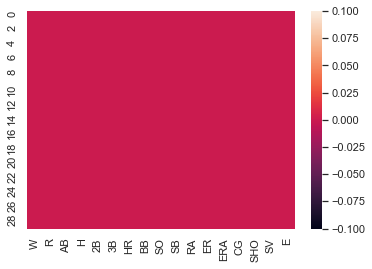

In [85]:
#once again checking null value through heat map
sns.heatmap(ds.isnull())

observations: no null values are present

# EDA 

# EDA using Data Visualisations

# (i) Univariate Analysis

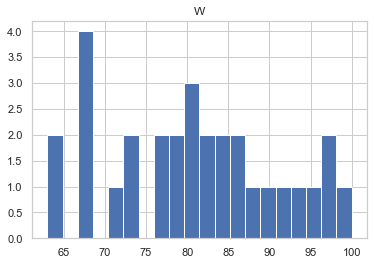

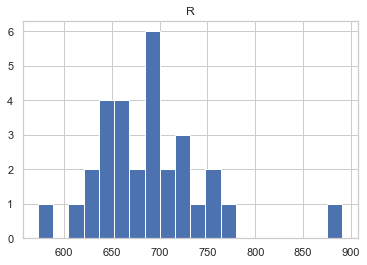

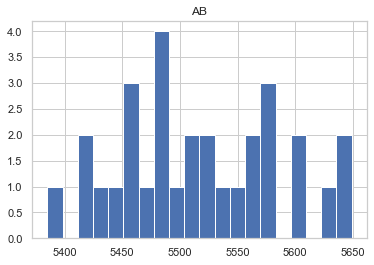

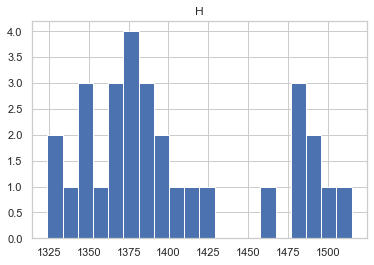

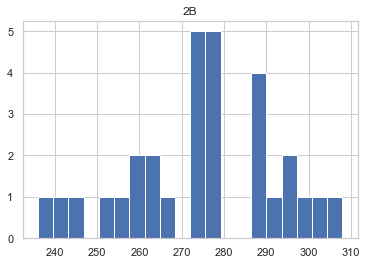

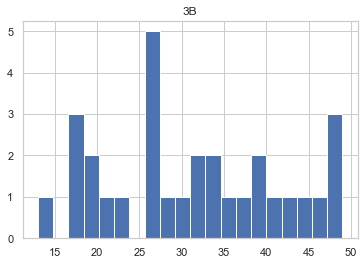

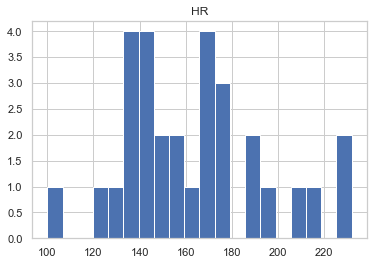

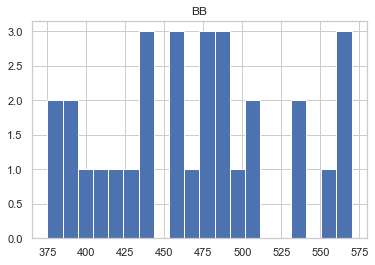

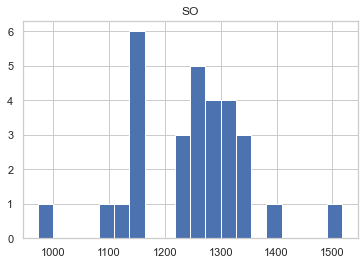

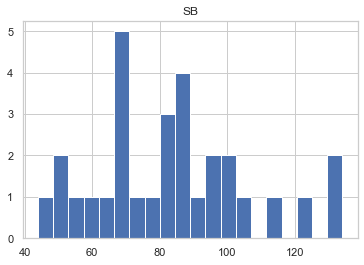

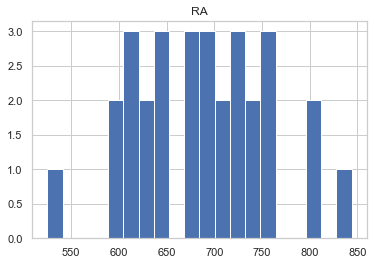

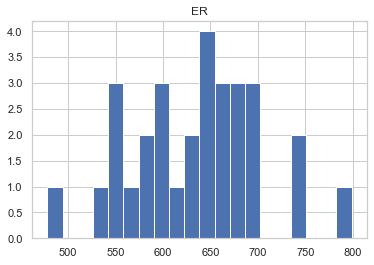

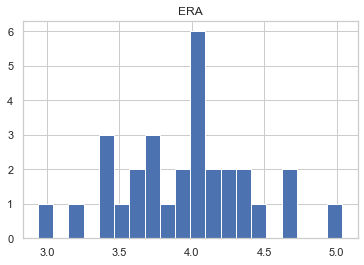

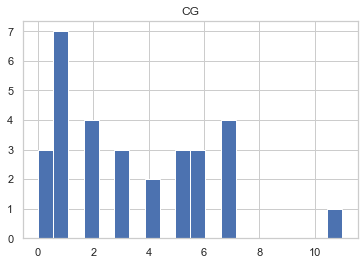

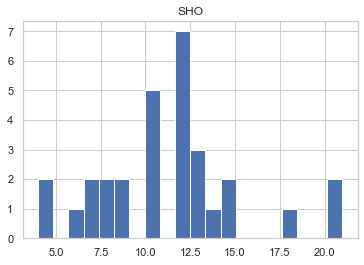

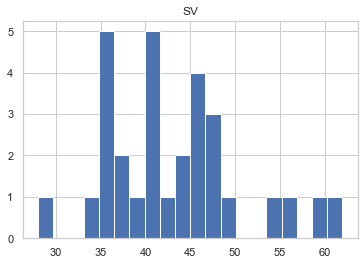

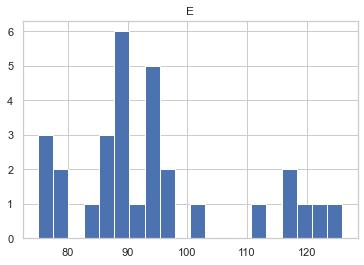

In [86]:
#using the below code creating histplot.
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

for i in ds[columns]:
    plt.figure()
    plt.title(i)
    ds[i].hist(bins=20)

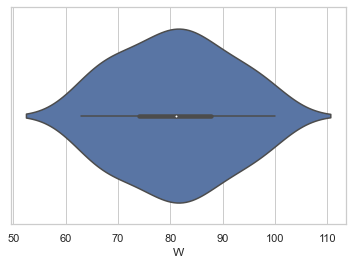

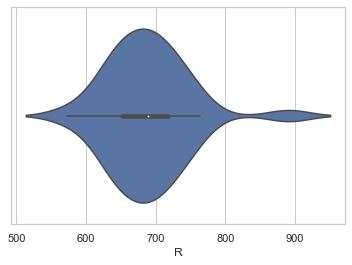

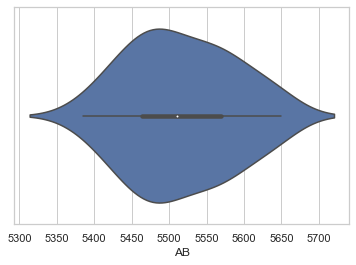

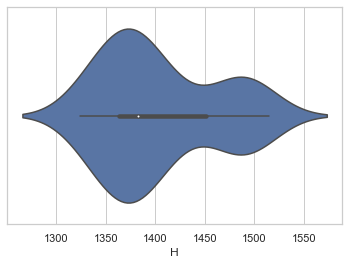

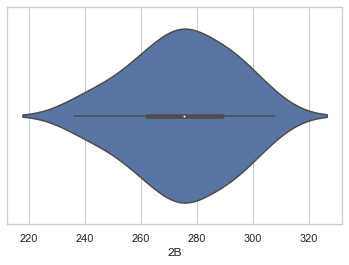

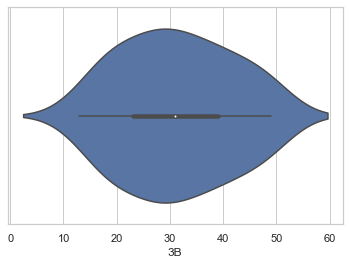

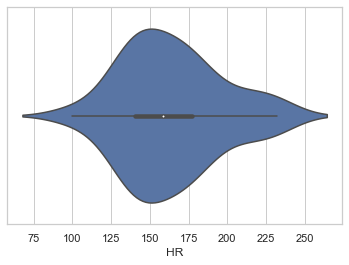

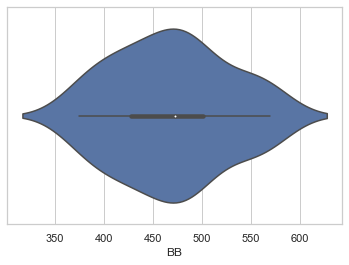

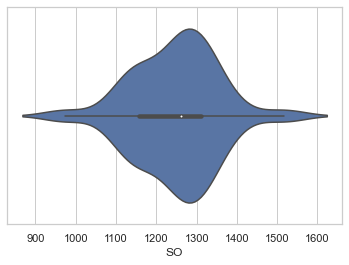

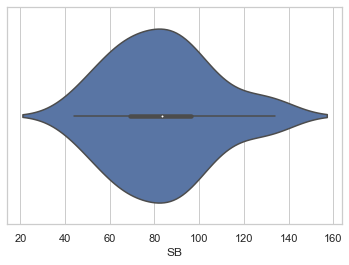

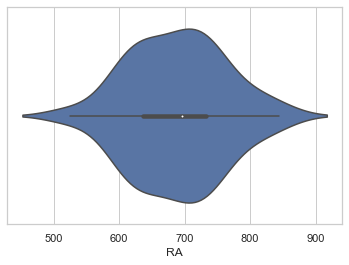

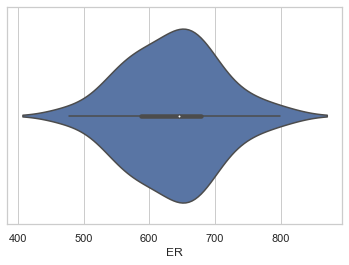

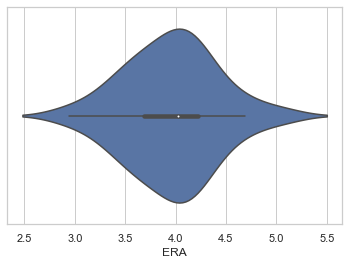

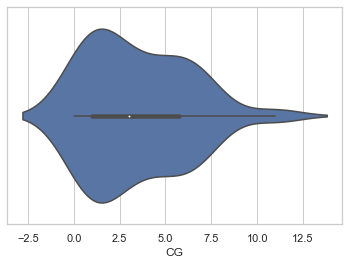

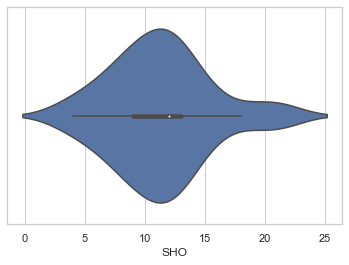

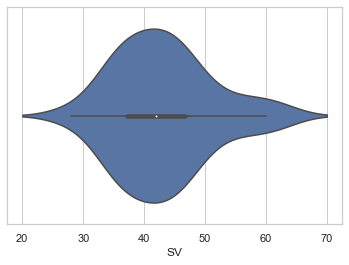

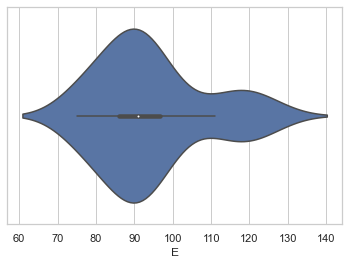

In [87]:
#using the below code creating violinplot.
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

for i in ds[columns]:
    plt.figure()
    sns.violinplot(ds[i], data=ds)

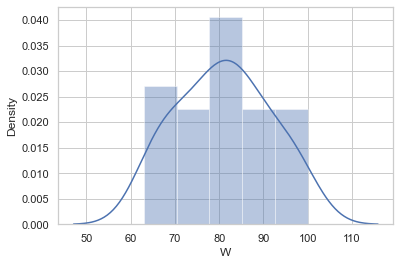

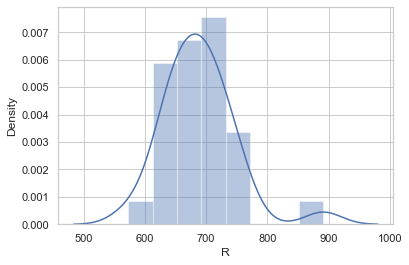

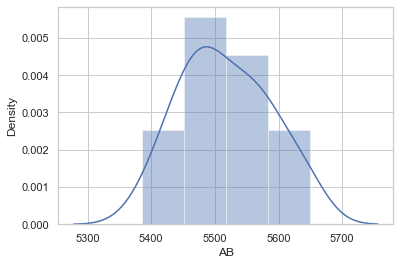

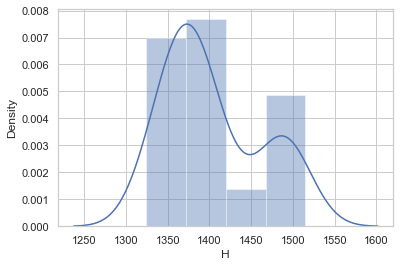

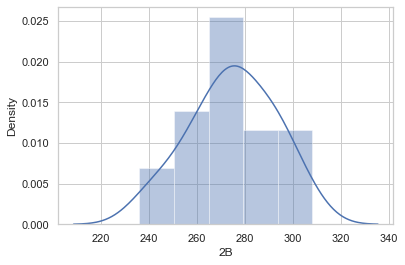

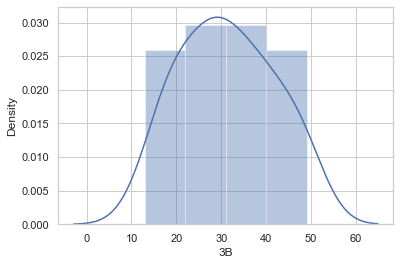

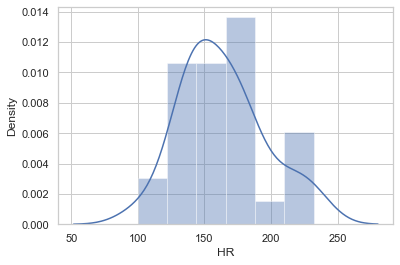

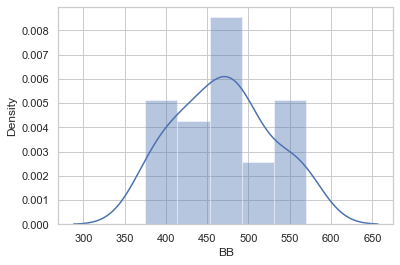

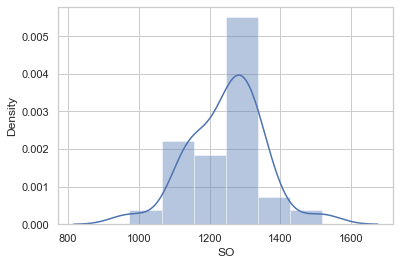

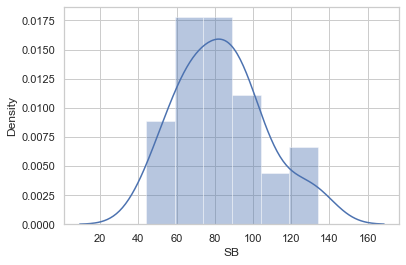

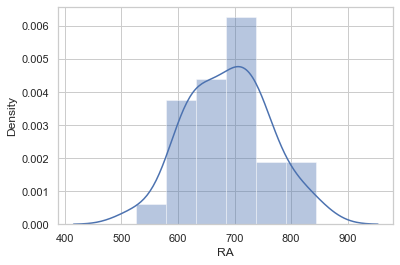

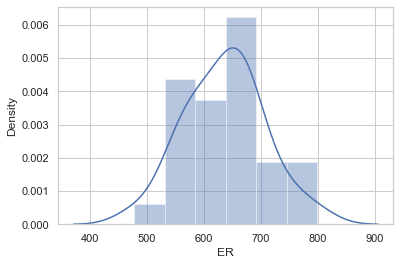

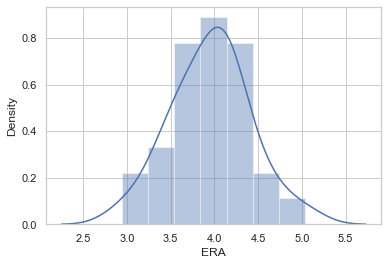

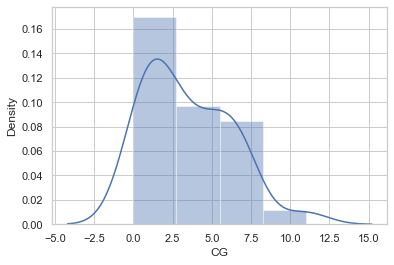

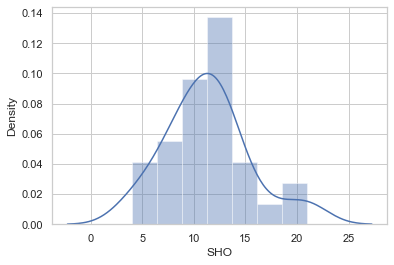

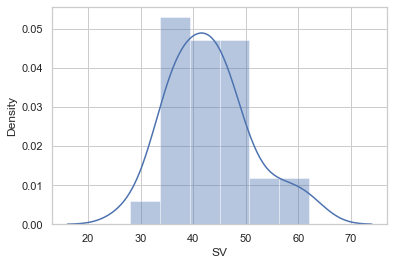

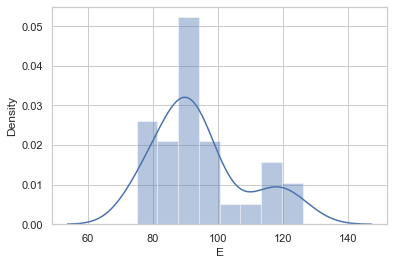

In [88]:
columns =['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']
for i in ds[columns]:
    plt.figure()
    sns.distplot(ds[i],kde=True)

# (ii) Bivariate Analysis

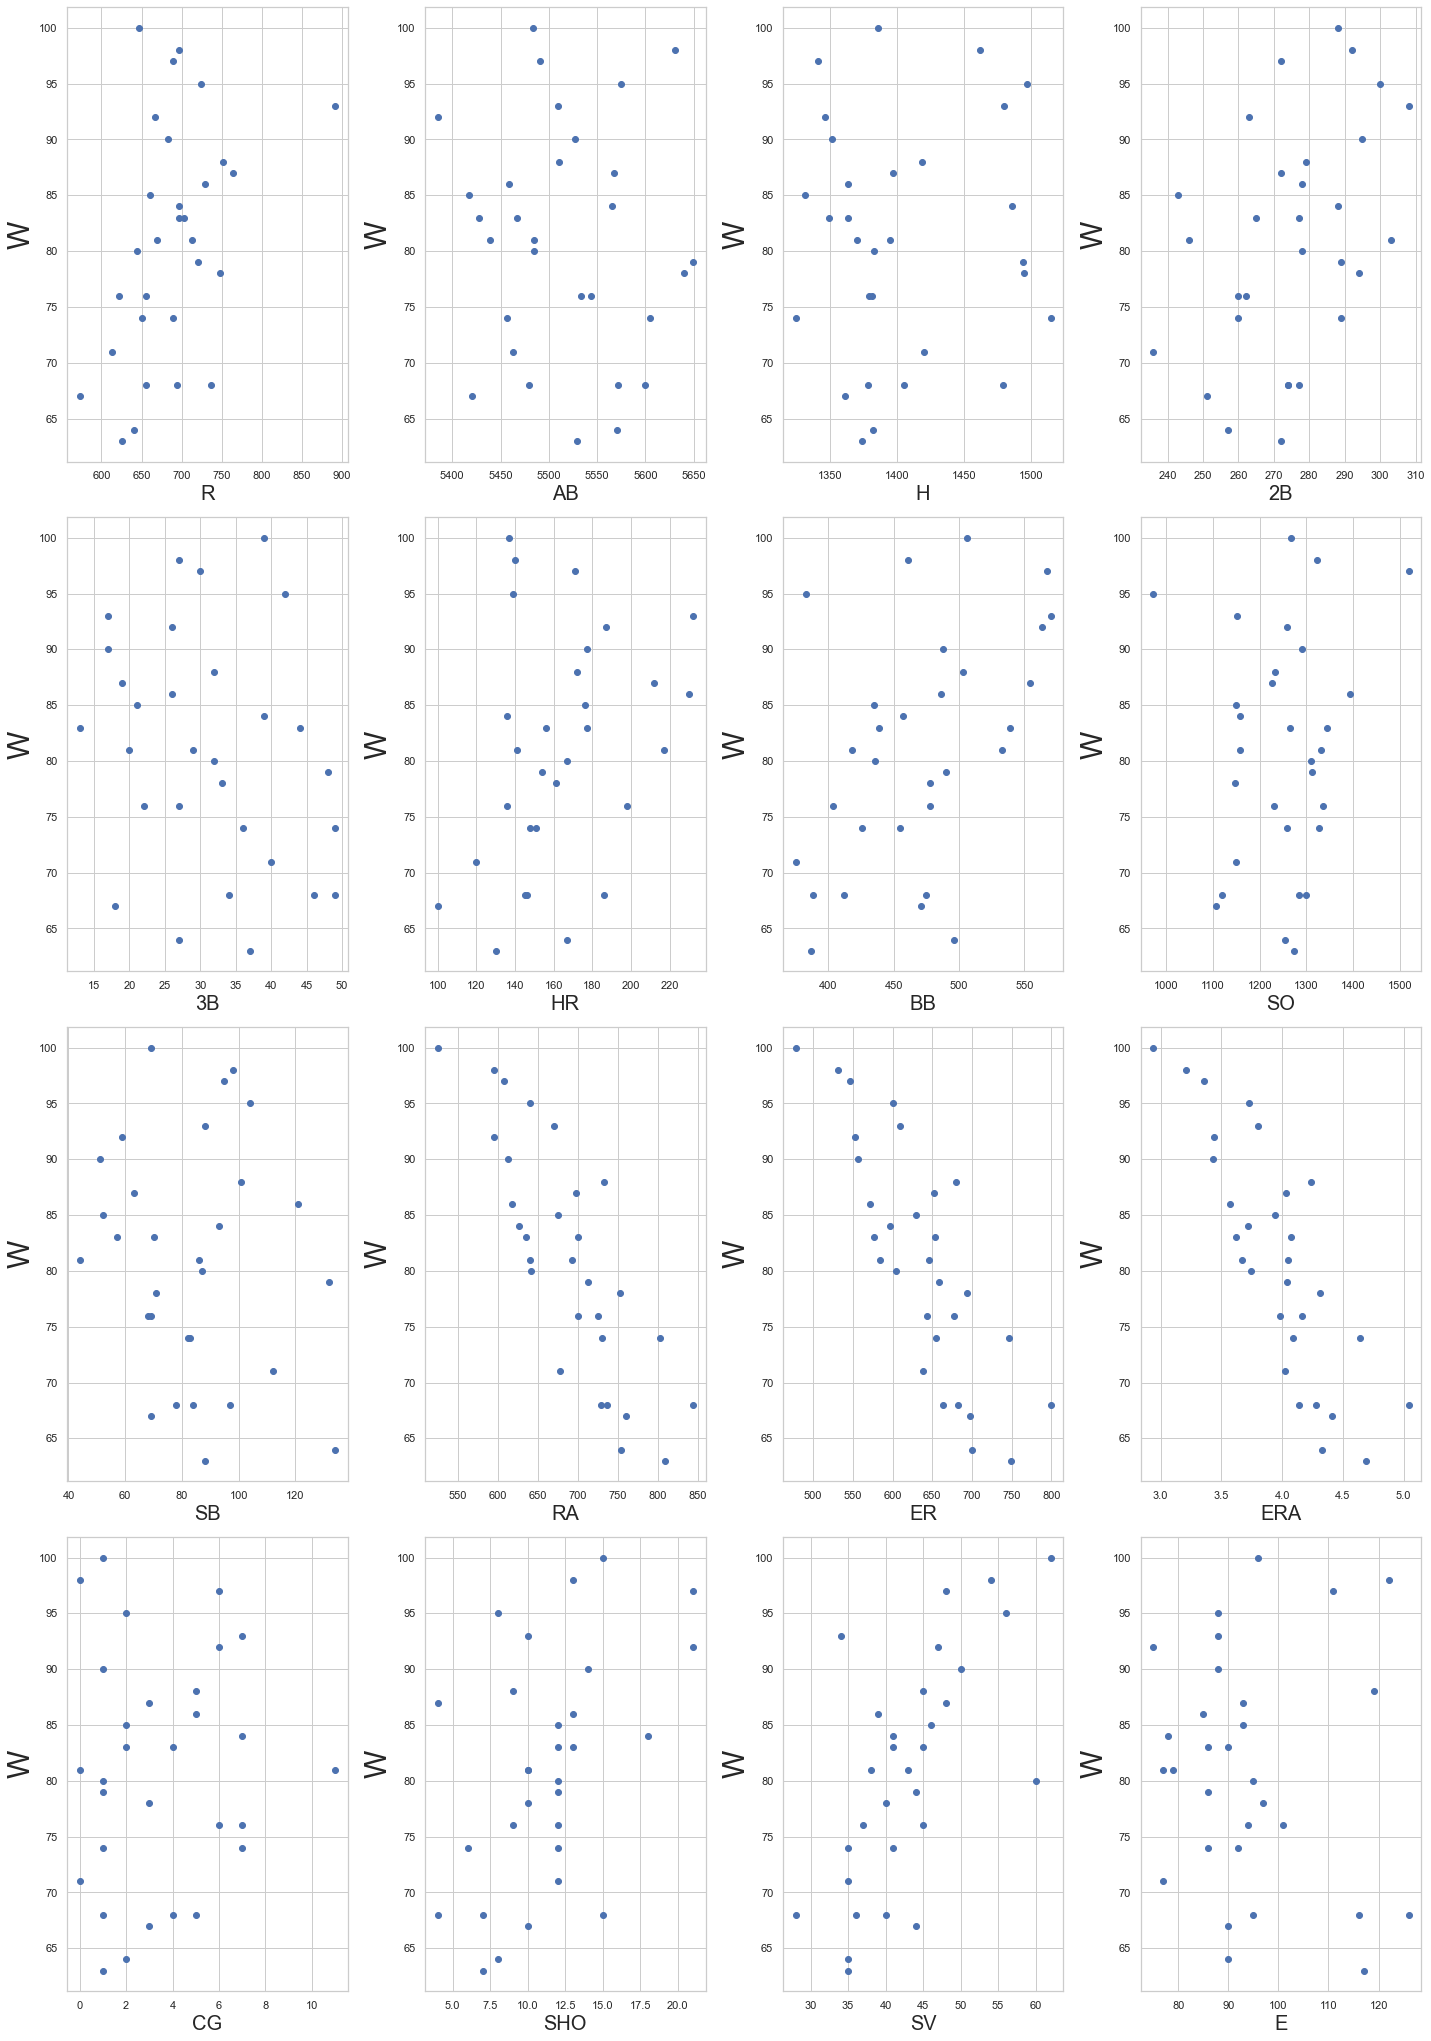

In [89]:
columns1 =['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']
plt.figure(figsize=(20,35),facecolor='white')
p=1

for i in ds[columns1]:
    if p<=16:
        ax=plt.subplot(5,4,p)
        plt.scatter(x=ds[i], y="W", data=ds)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('W',fontsize=30)
        
    p+=1
plt.tight_layout()

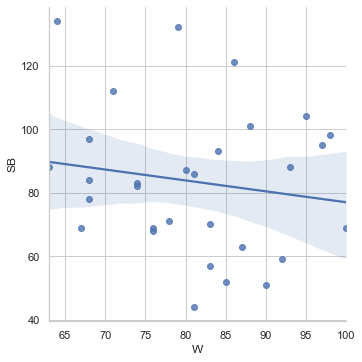

In [90]:
sns.lmplot(y="SB",x="W",data=ds)

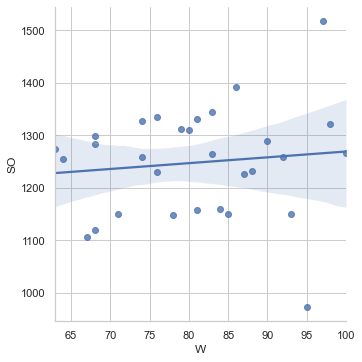

In [91]:
sns.lmplot(y="SO",x="W",data=ds)

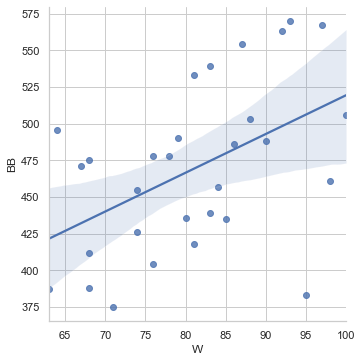

In [92]:
sns.lmplot(y="BB",x="W",data=ds) 

observations: there are a kind of linear relation between Walk and winings

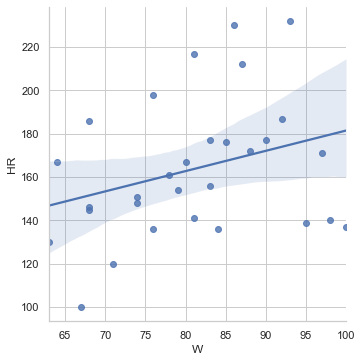

In [93]:
sns.lmplot(y="HR",x="W",data=ds) 

observations: a kind of linear relation between Homeruns and win.

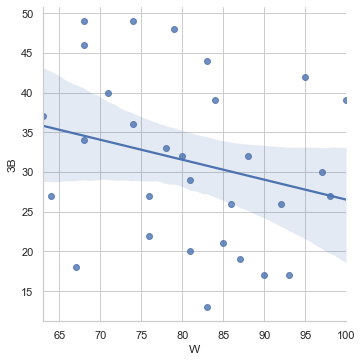

In [94]:
sns.lmplot(y="3B",x="W",data=ds)

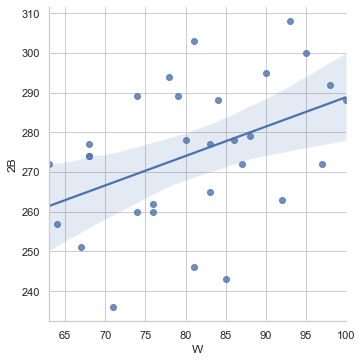

In [95]:
sns.lmplot(y="2B",x="W",data=ds)

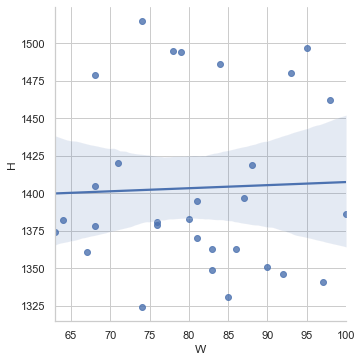

In [96]:
sns.lmplot(y="H",x="W",data=ds)

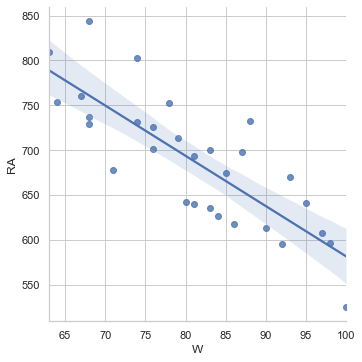

In [97]:
sns.lmplot(y="RA",x="W",data=ds)

observations: There are linear relation (negative) between wins and Runs Allowed

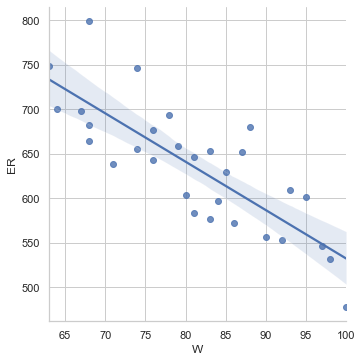

In [98]:
sns.lmplot(y="ER",x="W",data=ds)

observations: There are linear relation (negative) between wins and Earned Runs

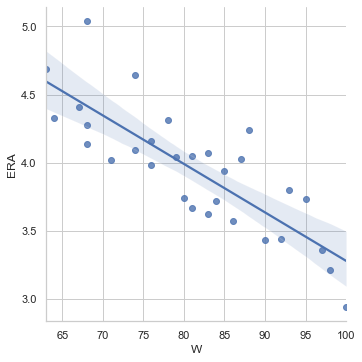

In [99]:
sns.lmplot(y="ERA",x="W",data=ds)

observations: There are linear relation (negative) between wins and Earned Runs Average

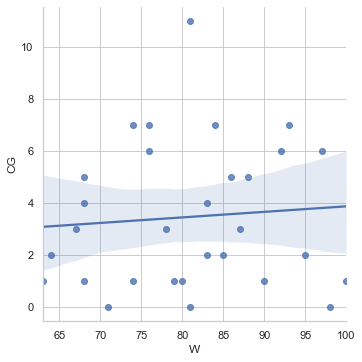

In [100]:
sns.lmplot(y="CG",x="W",data=ds)

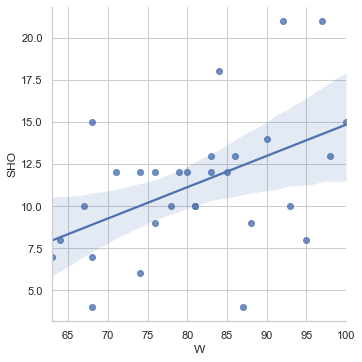

In [101]:
sns.lmplot(y="SHO",x="W",data=ds)

observations: There are linear relation between wins and Shutouts

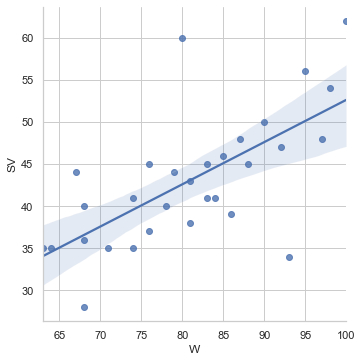

In [102]:
sns.lmplot(y="SV",x="W",data=ds)

observation: There are linear relation between wins and Saves

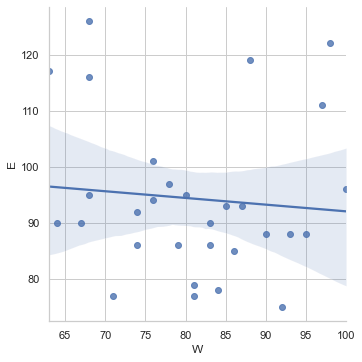

In [103]:
sns.lmplot(y="E",x="W",data=ds)

# (iii) Multivariate Analysis

<AxesSubplot:>

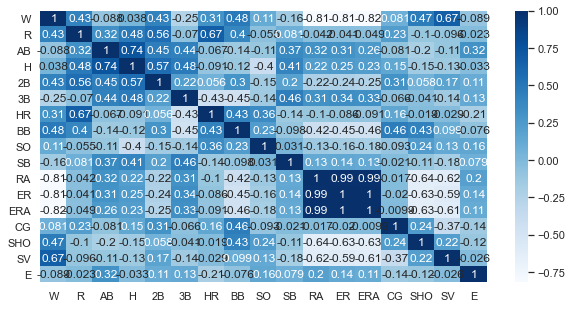

In [104]:
#lets check the correlation matrix
#method ("pearson")

fig=plt.figure(figsize=(10,5))
hc=ds.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")



Observations: 
    
    1. highly correlation between ER (Earned Runs) and ERA ( Earned Runs avarge)
    2. high correlation between RA (Runs Allowed) and EA (Earned Runs)

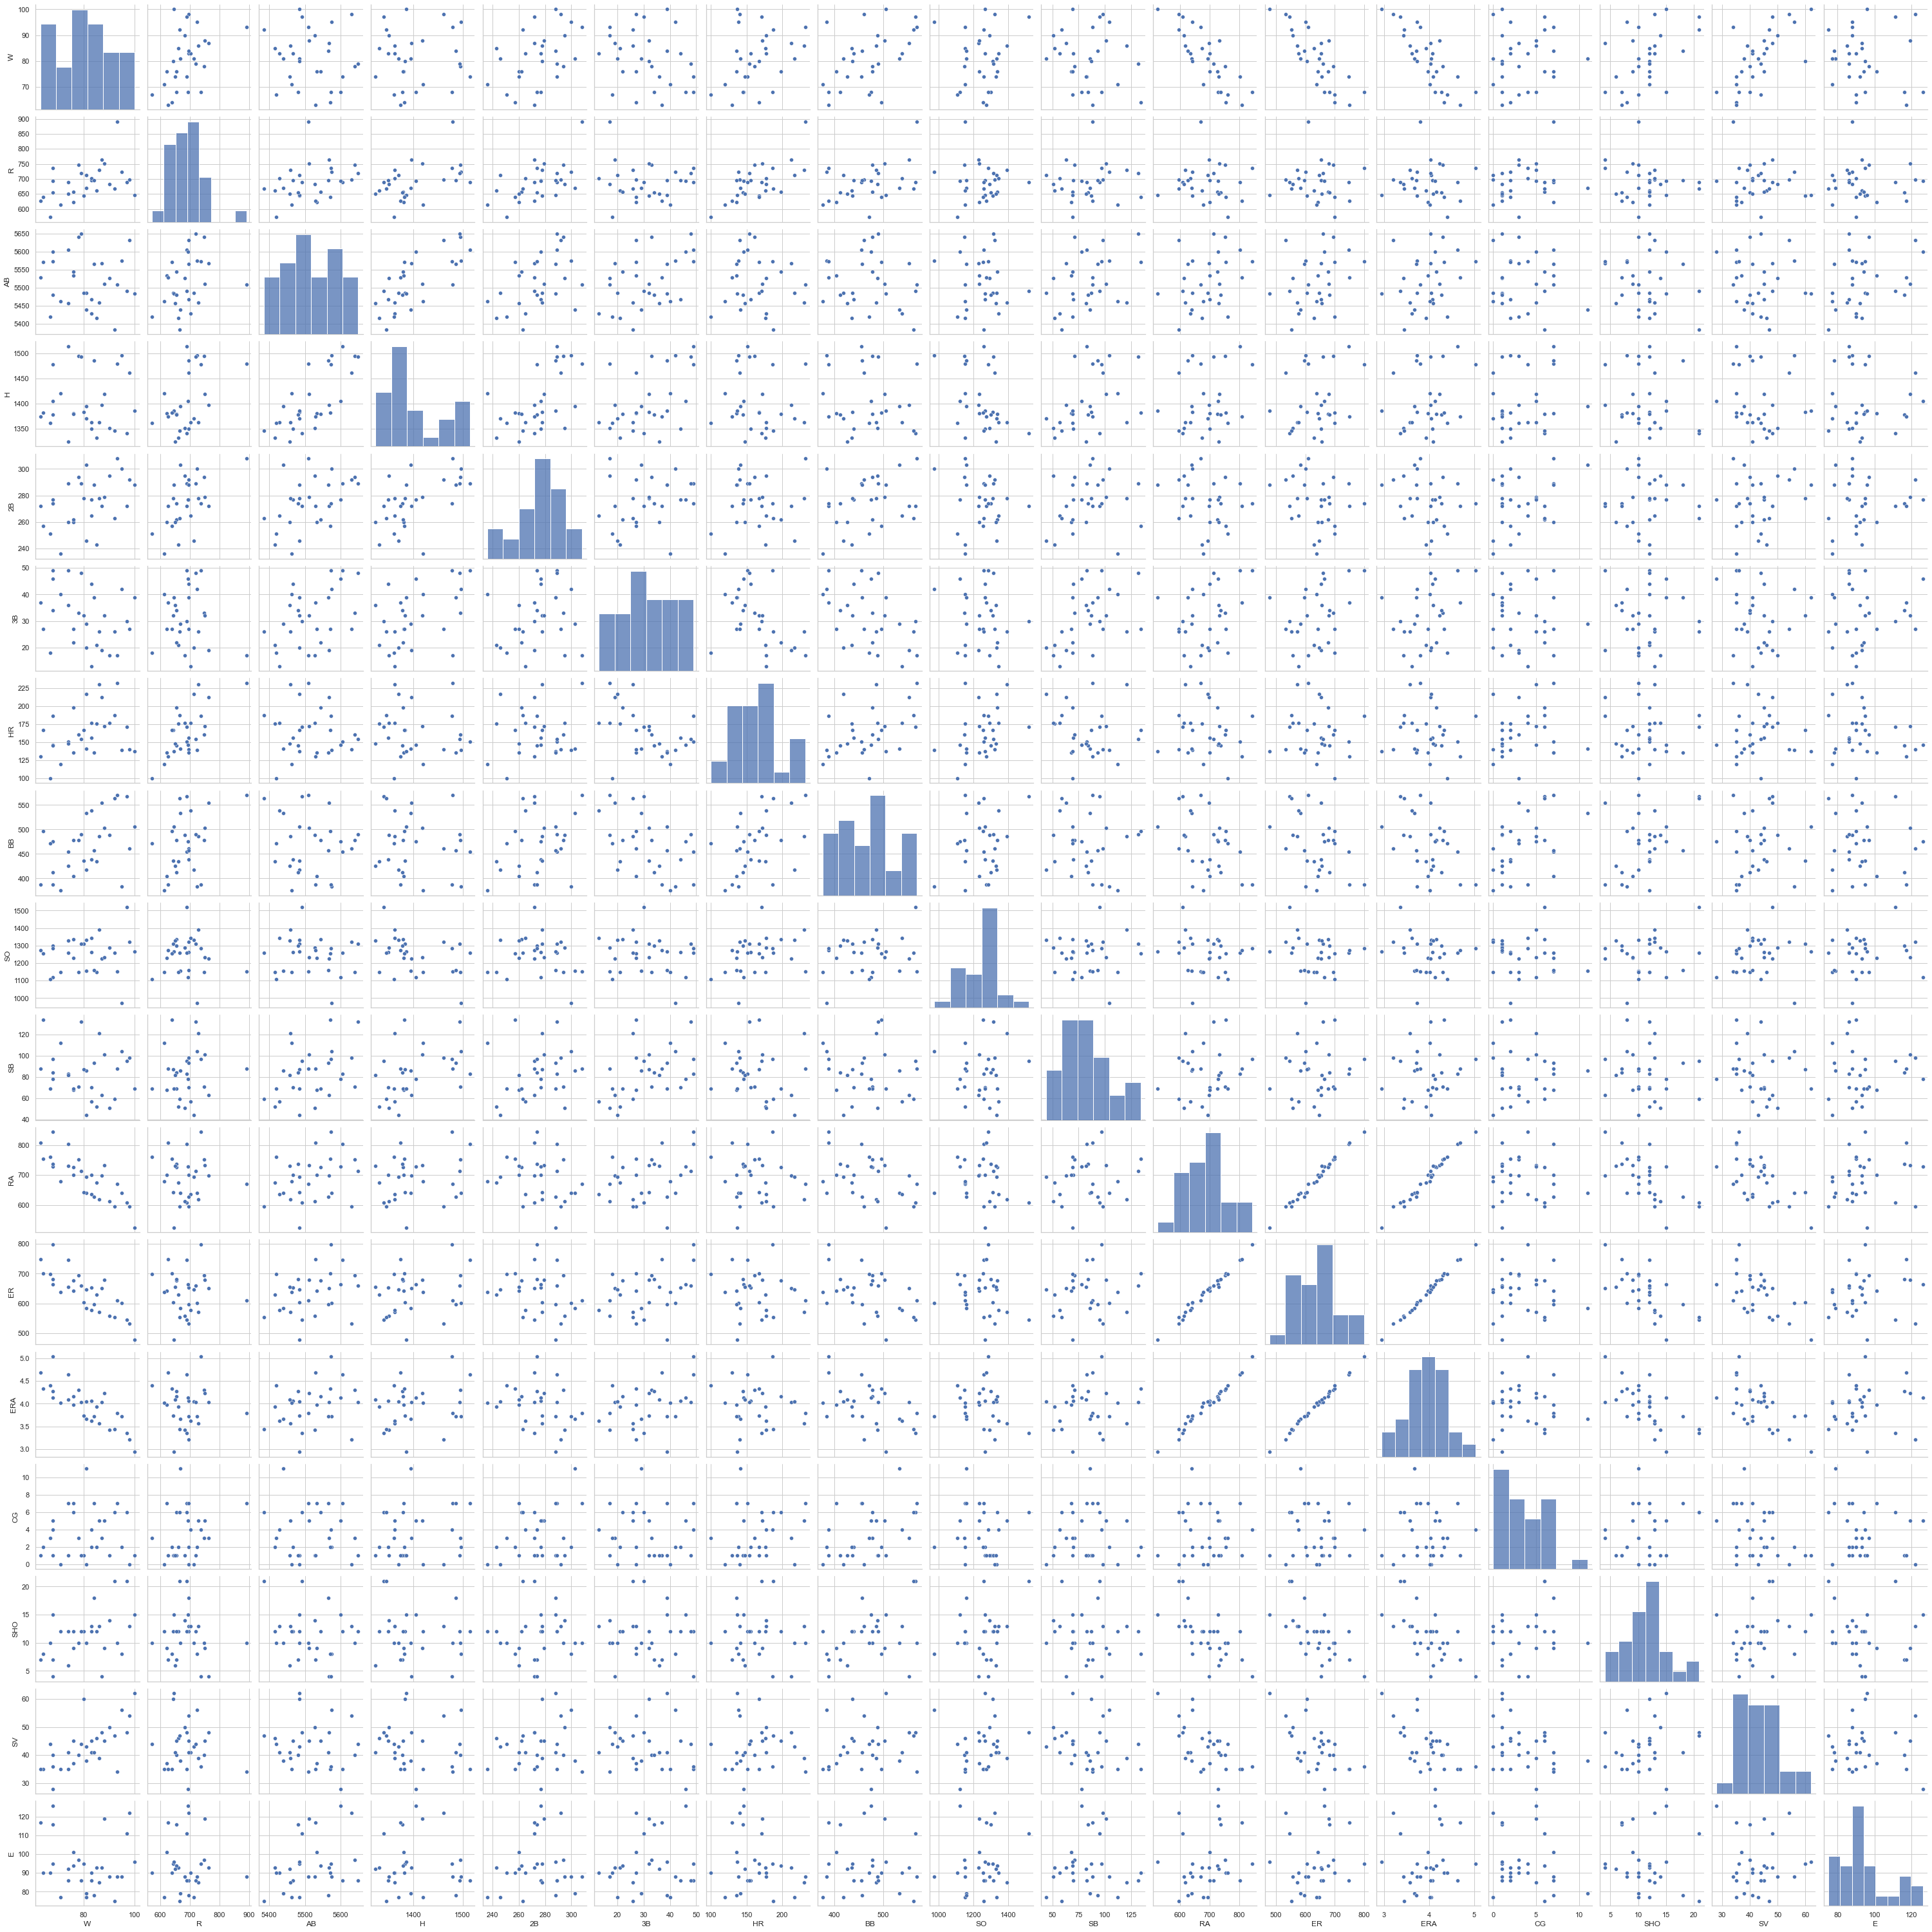

In [105]:
#showing pair plot in one frame
sns.pairplot(ds)

# Removing outliers & Skew 

W         AxesSubplot(0.125,0.772143;0.227941x0.107857)
R      AxesSubplot(0.398529,0.772143;0.227941x0.107857)
AB     AxesSubplot(0.672059,0.772143;0.227941x0.107857)
H         AxesSubplot(0.125,0.642714;0.227941x0.107857)
2B     AxesSubplot(0.398529,0.642714;0.227941x0.107857)
3B     AxesSubplot(0.672059,0.642714;0.227941x0.107857)
HR        AxesSubplot(0.125,0.513286;0.227941x0.107857)
BB     AxesSubplot(0.398529,0.513286;0.227941x0.107857)
SO     AxesSubplot(0.672059,0.513286;0.227941x0.107857)
SB        AxesSubplot(0.125,0.383857;0.227941x0.107857)
RA     AxesSubplot(0.398529,0.383857;0.227941x0.107857)
ER     AxesSubplot(0.672059,0.383857;0.227941x0.107857)
ERA       AxesSubplot(0.125,0.254429;0.227941x0.107857)
CG     AxesSubplot(0.398529,0.254429;0.227941x0.107857)
SHO    AxesSubplot(0.672059,0.254429;0.227941x0.107857)
SV           AxesSubplot(0.125,0.125;0.227941x0.107857)
E         AxesSubplot(0.398529,0.125;0.227941x0.107857)
dtype: object

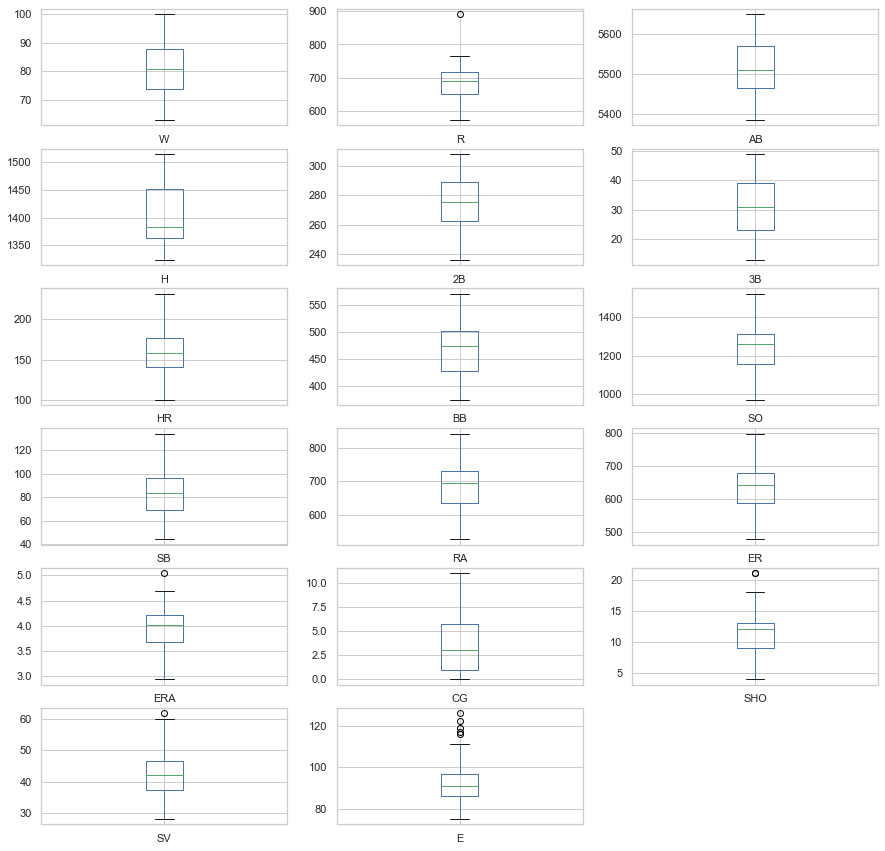

In [106]:
ds.plot(kind="box",subplots=True,layout=(6,3),figsize=(15,15))

observations: there is oulier in some of the columns

In [107]:
# checking skewness
#have to correct skewness as well (values are more than +0.5 and less than -0.5)
ds.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Observations: there are skewness in few parameters

In [108]:
#Removing the Outliers through IQR method
def removeOutlier(col):
    sorted(col)
    qua1,qua2=col.quantile([0.25,0.75])
    IQR=qua2 - qua1
    lowerRange = qua1- (1.5*IQR)
    upperRange = qua2+(1.5*IQR)
    return lowerRange, upperRange

In [109]:
columns=["R","ERA", "SHO", "SV", "E"]
for i in ds[columns]:
    lowScore, highScore= removeOutlier(ds[i])
    ds[i]=np.where(ds[i]>highScore,highScore,ds[i])
    ds[i]=np.where(ds[i]<lowScore,lowScore,ds[i])

W         AxesSubplot(0.125,0.772143;0.227941x0.107857)
R      AxesSubplot(0.398529,0.772143;0.227941x0.107857)
AB     AxesSubplot(0.672059,0.772143;0.227941x0.107857)
H         AxesSubplot(0.125,0.642714;0.227941x0.107857)
2B     AxesSubplot(0.398529,0.642714;0.227941x0.107857)
3B     AxesSubplot(0.672059,0.642714;0.227941x0.107857)
HR        AxesSubplot(0.125,0.513286;0.227941x0.107857)
BB     AxesSubplot(0.398529,0.513286;0.227941x0.107857)
SO     AxesSubplot(0.672059,0.513286;0.227941x0.107857)
SB        AxesSubplot(0.125,0.383857;0.227941x0.107857)
RA     AxesSubplot(0.398529,0.383857;0.227941x0.107857)
ER     AxesSubplot(0.672059,0.383857;0.227941x0.107857)
ERA       AxesSubplot(0.125,0.254429;0.227941x0.107857)
CG     AxesSubplot(0.398529,0.254429;0.227941x0.107857)
SHO    AxesSubplot(0.672059,0.254429;0.227941x0.107857)
SV           AxesSubplot(0.125,0.125;0.227941x0.107857)
E         AxesSubplot(0.398529,0.125;0.227941x0.107857)
dtype: object

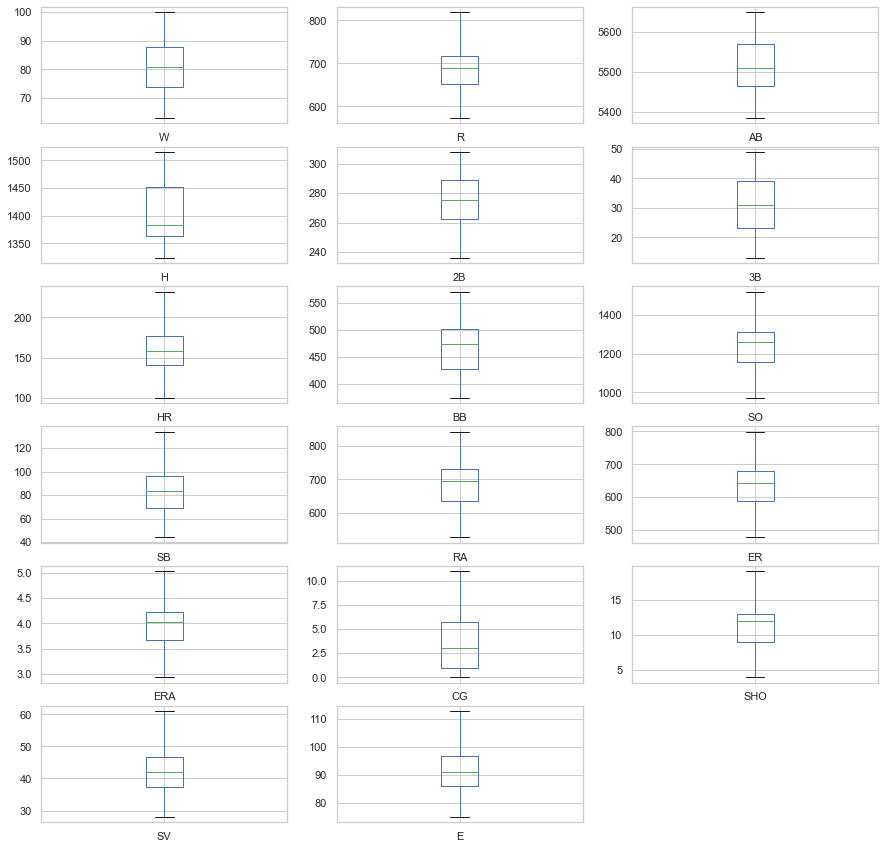

In [110]:
ds.plot(kind="box",subplots=True,layout=(6,3),figsize=(15,15))


Observation:outlier is removed now

In [111]:
ds.skew()



W      0.047089
R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

observations: Skewness almost resolved now

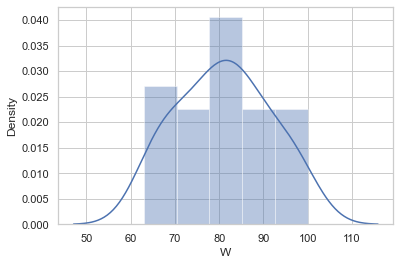

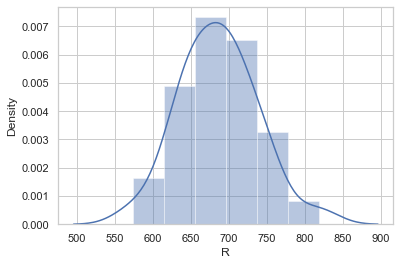

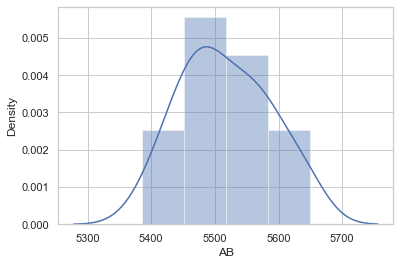

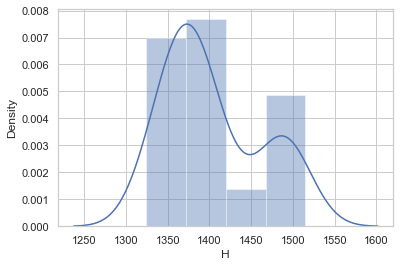

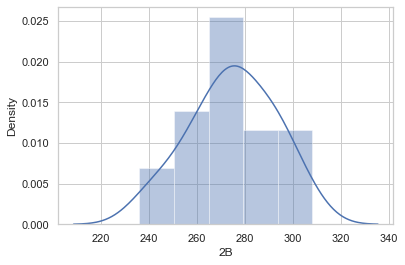

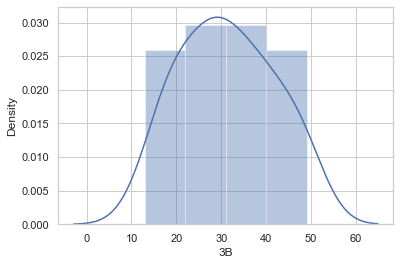

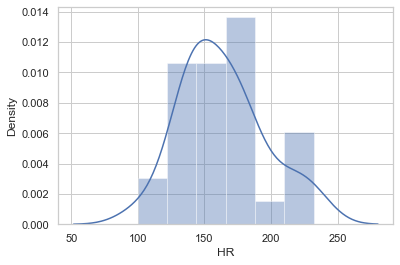

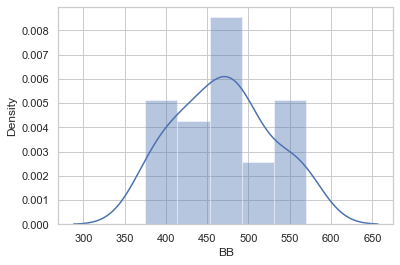

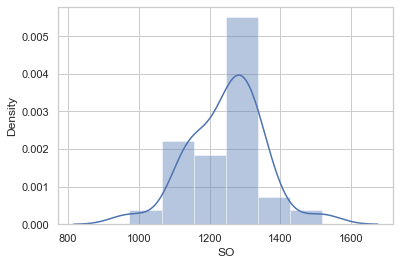

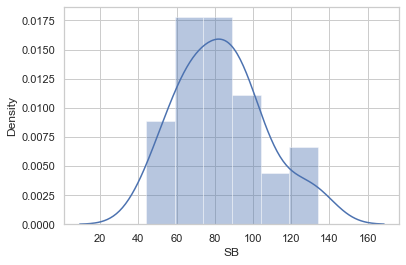

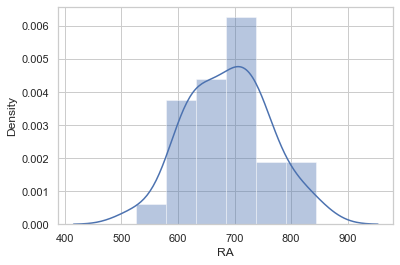

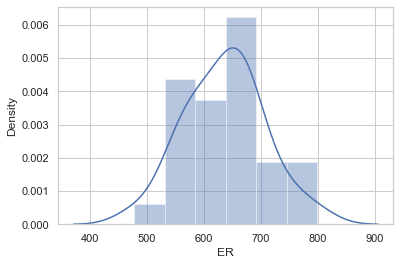

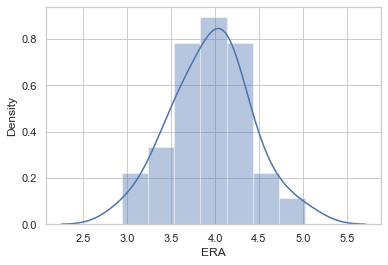

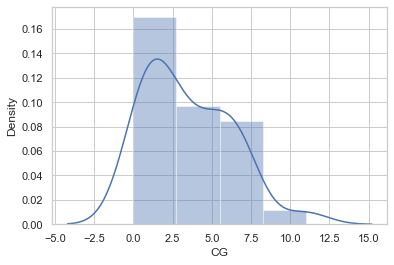

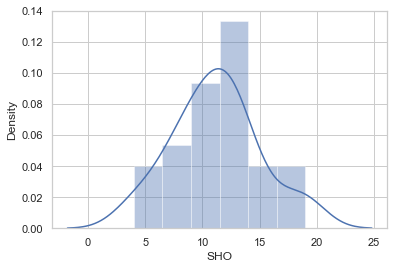

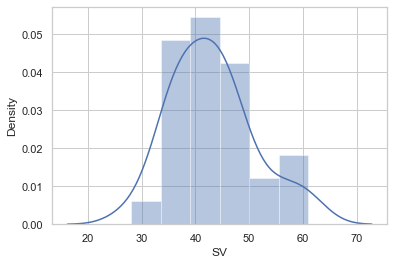

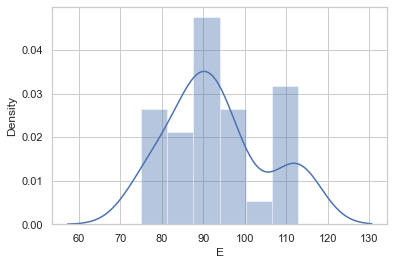

In [112]:
# checking skewness through the graph
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

for i in ds[columns]:
    plt.figure()
    sns.distplot(ds[i])

observations: skewness observed in few parameters

In [113]:
#deviding dataset in terms of input and output 
ds_x=ds.drop(columns=["W"])
y=ds[["W"]]

In [114]:
#resolving skewness using power tranform method
ds_new=power_transform(ds_x)
ds_new=pd.DataFrame(ds_new,columns=ds_x.columns)


In [115]:
ds_new.skew()

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001204
CG    -0.059785
SHO   -0.017889
SV     0.001270
E      0.032939
dtype: float64

Observations: Skewness almost resolved

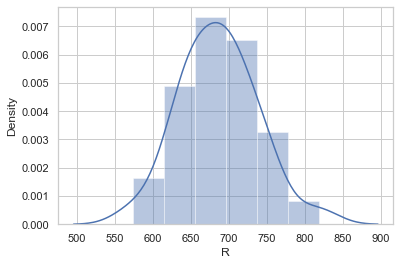

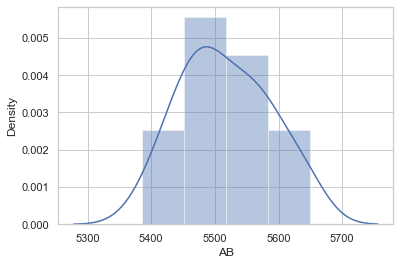

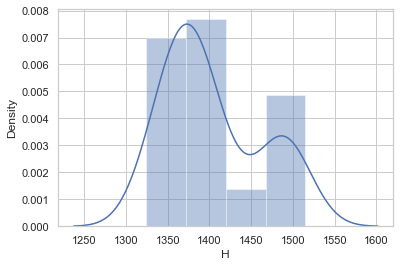

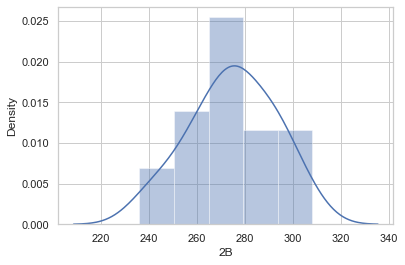

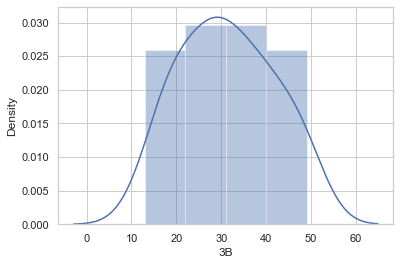

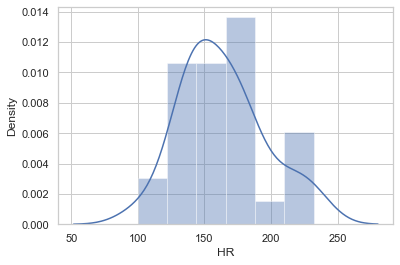

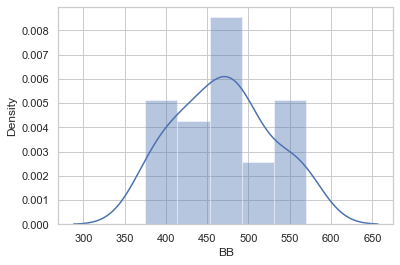

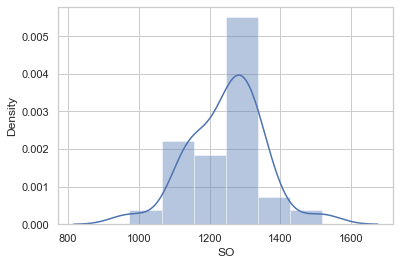

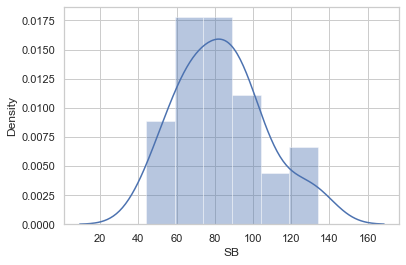

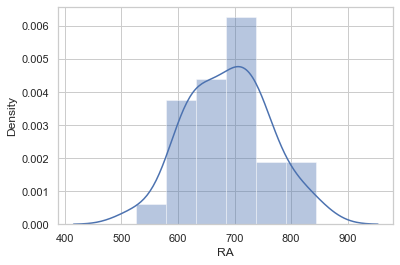

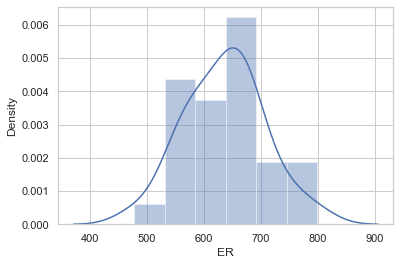

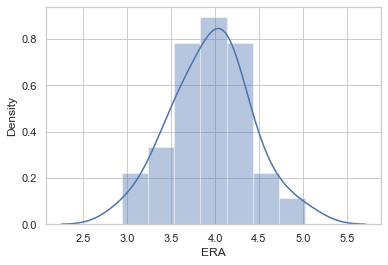

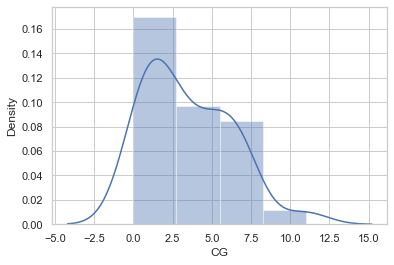

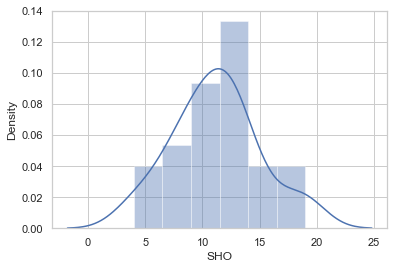

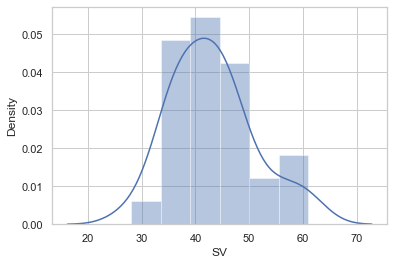

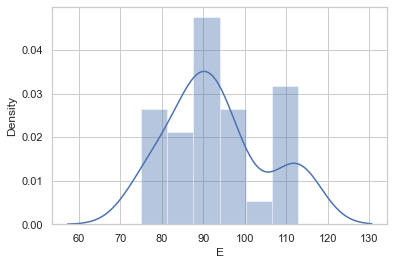

In [116]:
columns = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

for i in ds_new[columns]:
    plt.figure()
    sns.distplot(ds[i])

In [117]:
x=ds_new

# Train and Test

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23, 16)
(7, 16)
(23, 1)
(7, 1)


In [119]:

lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [120]:
#checking the score of model 
lm.score(x_train,y_train)

0.8972055757866227

observations: model is 89.72% accurate

In [121]:
pred=lm.predict(x_test)
print("Predicted value and actual value",'\n', 'Predict Value:',pred,'\n','Y-Test Value:','\n',y_test)
print("Predicted value and actual value", pred,y_test)

Predicted value and actual value 
 Predict Value: [[85.70741027]
 [78.03667124]
 [96.97476051]
 [82.67505617]
 [84.01919087]
 [76.92326653]
 [69.60940171]] 
 Y-Test Value: 
      W
16  98
27  79
25  92
5   93
13  76
9   78
29  68
Predicted value and actual value [[85.70741027]
 [78.03667124]
 [96.97476051]
 [82.67505617]
 [84.01919087]
 [76.92326653]
 [69.60940171]]      W
16  98
27  79
25  92
5   93
13  76
9   78
29  68


In [122]:
lm.coef_

array([[ 0.00000000e+00,  7.99360578e-15,  1.37667655e-14,
        -9.31187650e-01,  2.88402472e+00,  4.22840002e+00,
        -5.91229629e-02, -1.73708349e+00, -7.36954763e-01,
         7.92358194e+00, -1.47776734e+01,  2.22937219e+00,
         2.94280644e+00,  8.35448790e-01,  6.05215311e+00,
        -5.47561710e-02]])

In [123]:
lm.intercept_

array([80.63152524])

In [124]:
#finding r2 score and mean squar error in model 

print("error:")

print("Mean absolute error:", mean_absolute_error(y_test, pred))
print("Mean squared error:", mean_squared_error(y_test,pred))

print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))


error:
Mean absolute error: 5.6087069834287036
Mean squared error: 50.20648897274159
Root Mean Squared Error: 7.085653743497603


In [125]:
print(r2_score(y_test,pred))

0.511687582440584


observation: r2 score is 0.5116

# REGULARIZATION: L1 AND L2 REGULARIZATION

L1- LASSO REGRESSION L2- RIDGE REGRESSION

In [130]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

# Lasso

In [131]:
#will reduce the coefficient to zero (those features are not informative)
#alpha values could be  ---> .0001,.001,.01,.1,1,10,.... >higher value reduce all coefficients towords 0 and impact output
#Default values of alpha = 1.0
ls=Lasso(alpha=.0001)
#ls=Lasso(alpha=1.0) # Default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.897201616095375

In [132]:
ls.coef_

array([  0.        ,   0.        ,   0.        ,  -0.92972191,
         2.87685367,   4.20673278,  -0.05386969,  -1.72544063,
        -0.7449945 ,   7.75797809, -14.2684727 ,   1.87089059,
         2.93951426,   0.82554176,   6.03382976,  -0.05411137])

# LassoCV

In [134]:
#LassoCV will return best alpha and coefficient after performing 20 cross validations
ls=LassoCV(alphas=None,cv=20,max_iter=100,normalize=True)
ls.fit(x_train,y_train)
alpha=ls.alpha_
alpha

0.06906429725654571

# Ridge

In [135]:
#try to minimize the coefficient variance

rd=Ridge(alpha=0.069)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8955015002774793

In [136]:
rd.coef_

array([[ 0.        ,  0.        ,  0.        , -0.83700007,  2.74445694,
         3.73788994,  0.1158531 , -1.40959781, -0.94379605,  3.28516779,
        -5.56256552, -2.64228548,  2.8486715 ,  0.56542747,  5.59877652,
         0.04231947]])

# RidgeCV

In [138]:
#RidgeCV will return best alpha and coefficient after performing 20 cross validations.
#we are passing random numbers of array for ridgeCV to select best alpha from them
alphas=np.random.uniform(low=0,high=20,size=(30,))
rc=RidgeCV(alphas=alphas,cv=20,normalize=True)
rc.fit(x_train,y_train)


RidgeCV(alphas=array([ 9.42720186,  1.59708713, 19.89787296,  6.25701705,  7.63620857,
        1.48773017, 11.74398444, 16.14907465,  2.86229031,  5.55565022,
       15.71755685, 17.30973402, 10.11854236,  8.42733789, 16.98144646,
        5.6436    ,  0.72580103, 17.15357816, 11.19968714,  2.86315554,
       11.46970646, 19.35527663, 12.86633201,  3.77062816,  4.84324591,
       17.96617361,  5.86549726, 16.5044504 , 19.28689895,  1.04643596]),
        cv=20, normalize=True)

In [139]:
rc.alpha_

9.427201856423238

# Elasticnet Regression

In [140]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.8971927138662136


array([  0.        ,   0.        ,   0.        ,  -0.92843343,
         2.87104386,   4.18925919,  -0.04970846,  -1.71591969,
        -0.75163611,   7.62230252, -13.86117416,   1.58737323,
         2.93687324,   0.81761536,   6.01883031,  -0.05350776])

In [141]:
enr.coef_

array([  0.        ,   0.        ,   0.        ,  -0.92843343,
         2.87104386,   4.18925919,  -0.04970846,  -1.71591969,
        -0.75163611,   7.62230252, -13.86117416,   1.58737323,
         2.93687324,   0.81761536,   6.01883031,  -0.05350776])

# Saving the model

In [143]:
joblib.dump(lm,"base_ball.obj")

['base_ball.obj']

In [144]:
abalonefile=joblib.load("base_ball.obj")
abalonefile.predict(x_train)

array([[79.94535075],
       [82.65982625],
       [66.90314774],
       [59.93450923],
       [85.23820045],
       [66.61992876],
       [68.61606826],
       [70.02959681],
       [92.86414251],
       [83.32352901],
       [85.93934927],
       [87.57721953],
       [83.95360638],
       [90.26390895],
       [72.00935844],
       [83.08038674],
       [99.84684376],
       [72.88434755],
       [76.10411961],
       [82.47266892],
       [91.60508591],
       [75.93912247],
       [87.1896827 ]])